**1.** **Retrieving the Data**

In [ ]:
import os
from google.colab import files
import shutil

# Define paths
train_folder = "/content/TRAIN"
test_folder = "/content/TEST"

# Create folders
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Upload training frames
print("📤 Upload training .tif files")
uploaded_train = files.upload()
for filename in uploaded_train.keys():
    shutil.move(filename, os.path.join(train_folder, filename))

# Upload testing frames
print("📤 Upload testing .tif files")
uploaded_test = files.upload()
for filename in uploaded_test.keys():
    shutil.move(filename, os.path.join(test_folder, filename))

print("✅ Files organized into folders.")


📤 Upload training .tif files


Saving 027.tif to 027.tif
Saving 028.tif to 028.tif
Saving 029.tif to 029.tif
Saving 030.tif to 030.tif
Saving 031.tif to 031.tif
Saving 032.tif to 032.tif
Saving 033.tif to 033.tif
Saving 034.tif to 034.tif
Saving 035.tif to 035.tif
Saving 036.tif to 036.tif
Saving 037.tif to 037.tif
Saving 038.tif to 038.tif
Saving 039.tif to 039.tif
Saving 040.tif to 040.tif
Saving 041.tif to 041.tif
Saving 042.tif to 042.tif
Saving 043.tif to 043.tif
Saving 044.tif to 044.tif
Saving 045.tif to 045.tif
Saving 046.tif to 046.tif
Saving 047.tif to 047.tif
Saving 048.tif to 048.tif
Saving 049.tif to 049.tif
Saving 050.tif to 050.tif
Saving 051.tif to 051.tif
Saving 052.tif to 052.tif
Saving 053.tif to 053.tif
Saving 054.tif to 054.tif
Saving 055.tif to 055.tif
Saving 056.tif to 056.tif
Saving 057.tif to 057.tif
Saving 058.tif to 058.tif
Saving 059.tif to 059.tif
Saving 060.tif to 060.tif
Saving 061.tif to 061.tif
Saving 062.tif to 062.tif
Saving 063.tif to 063.tif
Saving 064.tif to 064.tif
Saving 065.t

Saving 200.tif to 200.tif
Saving 152.tif to 152.tif
Saving 153.tif to 153.tif
Saving 154.tif to 154.tif
Saving 155.tif to 155.tif
Saving 156.tif to 156.tif
Saving 157.tif to 157.tif
Saving 158.tif to 158.tif
Saving 159.tif to 159.tif
Saving 160.tif to 160.tif
Saving 161.tif to 161.tif
Saving 162.tif to 162.tif
Saving 163.tif to 163.tif
Saving 164.tif to 164.tif
Saving 165.tif to 165.tif
Saving 166.tif to 166.tif
Saving 167.tif to 167.tif
Saving 168.tif to 168.tif
Saving 169.tif to 169.tif
Saving 170.tif to 170.tif
Saving 171.tif to 171.tif
Saving 172.tif to 172.tif
Saving 173.tif to 173.tif
Saving 174.tif to 174.tif
Saving 175.tif to 175.tif
Saving 176.tif to 176.tif
Saving 177.tif to 177.tif
Saving 178.tif to 178.tif
Saving 179.tif to 179.tif
Saving 180.tif to 180.tif
Saving 181.tif to 181.tif
Saving 182.tif to 182.tif
Saving 183.tif to 183.tif
Saving 184.tif to 184.tif
Saving 185.tif to 185.tif
Saving 186.tif to 186.tif
Saving 187.tif to 187.tif
Saving 188.tif to 188.tif
Saving 189.t

**2.Data Preparation**

In [ ]:
import cv2
import numpy as np

def load_frames(folder_path, resize_shape=(128, 128)):
    frames = []
    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith(".tif"):
            frame = cv2.imread(os.path.join(folder_path, filename), cv2.IMREAD_GRAYSCALE)
            frame = cv2.resize(frame, resize_shape)
            frames.append(frame / 255.0)  # Normalize
    return np.array(frames)

# Load and reshape
train_frames = load_frames(train_folder)
test_frames = load_frames(test_folder)

X_train = train_frames.reshape(-1, 128, 128, 1)
X_test = test_frames.reshape(-1, 128, 128, 1)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (200, 128, 128, 1)
Test shape: (200, 128, 128, 1)


**3. Data Exploration**

Performing Quantitative Motion Analysis...


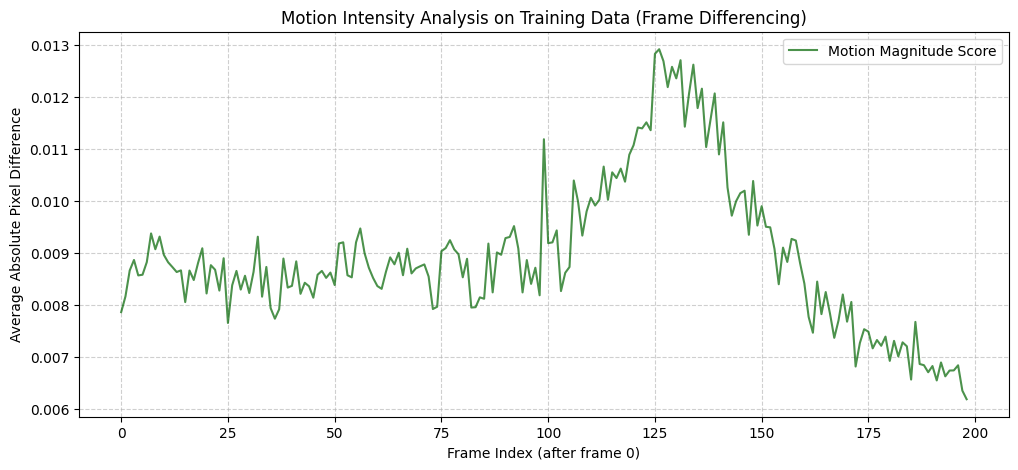


Performing Qualitative Visual Exploration...


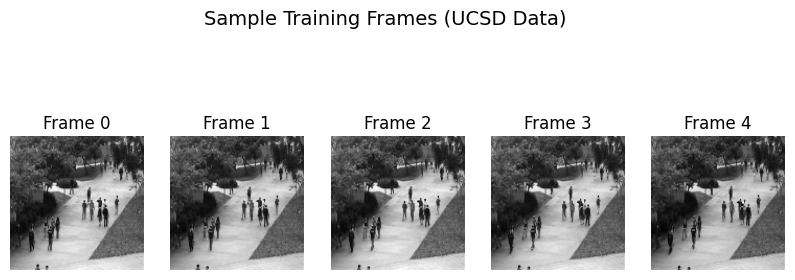

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
print("Performing Quantitative Motion Analysis...")
def calculate_motion_score(frames):
    scores = []
    for i in range(1, len(frames)):
        diff = np.abs(frames[i] - frames[i-1])
        motion_magnitude = np.mean(diff)
        scores.append(motion_magnitude)
    return np.array(scores)
motion_scores = calculate_motion_score(train_frames)
# Plotting the motion scores over time
plt.figure(figsize=(12, 5))
plt.plot(motion_scores, label='Motion Magnitude Score', color='darkgreen', alpha=0.7)
plt.title("Motion Intensity Analysis on Training Data (Frame Differencing)")
plt.xlabel("Frame Index (after frame 0)")
plt.ylabel("Average Absolute Pixel Difference")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
# Example of where anomalies might be detected in the plot:
# Spikes in this plot should correspond to these unusual activities.
print("\nPerforming Qualitative Visual Exploration...")
plt.figure(figsize=(10, 4))
num_samples = 5
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    frame_to_display = train_frames[i]
    if frame_to_display.ndim == 4:
        frame_to_display = frame_to_display.squeeze()

    plt.imshow(frame_to_display, cmap='gray')
    plt.title(f"Frame {i}")
    plt.axis('off')

plt.suptitle("Sample Training Frames (UCSD Data)", fontsize=14)
plt.show()

**4. Data Modelling (Autoencoder)**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_autoencoder(input_shape):
    input_img = layers.Input(shape=input_shape)

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

# Build and train
autoencoder = build_autoencoder((128, 128, 1))
autoencoder.fit(X_train, X_train, epochs=10, batch_size=8, validation_split=0.1)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 324ms/step - loss: 0.0495 - val_loss: 0.0233
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 253ms/step - loss: 0.0185 - val_loss: 0.0064
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 366ms/step - loss: 0.0077 - val_loss: 0.0049
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 311ms/step - loss: 0.0064 - val_loss: 0.0044
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 257ms/step - loss: 0.0057 - val_loss: 0.0042
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 312ms/step - loss: 0.0054 - val_loss: 0.0040
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 262ms/step - loss: 0.0051 - val_loss: 0.0038
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 273ms/step - loss: 0.0050 - val_loss: 0.0037
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 349ms/step - loss: 0.0049 - val_loss: 0.0037
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 324ms/step - loss: 0.0047 - val_loss: 0.0036


**5. Presentation and Automation**

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 408ms/step


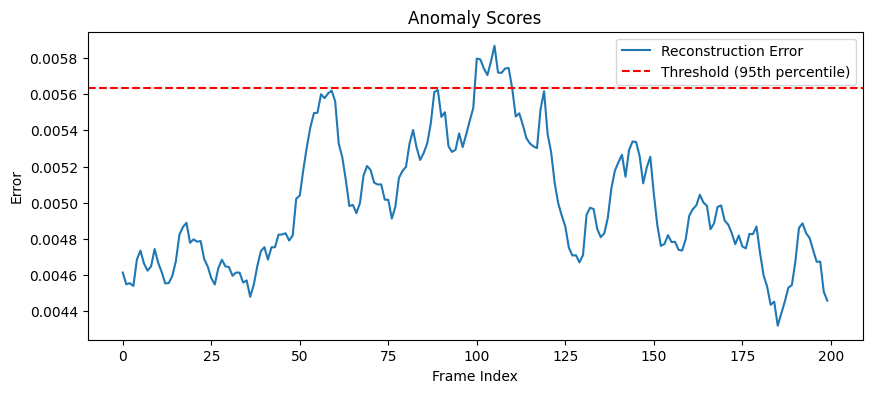

🚨 Anomalies detected at frames: [100 101 102 103 104 105 106 107 108 109]


In [ ]:
# Compute reconstruction error
def compute_error(frames, model):
    reconstructions = model.predict(frames)
    errors = np.mean(np.square(frames - reconstructions), axis=(1, 2, 3))
    return errors

errors = compute_error(X_test, autoencoder)

# Plot anomaly scores
plt.figure(figsize=(10, 4))
plt.plot(errors, label='Reconstruction Error')
plt.axhline(np.percentile(errors, 95), color='red', linestyle='--', label='Threshold (95th percentile)')
plt.title("Anomaly Scores")
plt.xlabel("Frame Index")
plt.ylabel("Error")
plt.legend()
plt.show()

# Detect anomalies
threshold = np.percentile(errors, 95)
anomalies = np.where(errors > threshold)[0]
print("🚨 Anomalies detected at frames:", anomalies)